# Video Game Sales Analysis

This dataset is taken from https://www.kaggle.com/datasets/gregorut/videogamesales

### Data Dictionary

| Column Name    | Description                                       | Data Type |
|----------------|---------------------------------------------------|-----------|
| `Rank`         | Ranking of overall sales                          | Integer   |
| `Name`         | The game's name                                   | String    |
| `Platform`     | Platform of the game's release                    | String    |
| `Year`         | Year of the game's release                        | Integer   |
| `Genre`        | Genre of the game                                 | String    |
| `Publisher`    | Publisher of the game                             | String    |
| `NA_Sales`     | Sales in North America (in millions)              | Float     |
| `EU_Sales`     | Sales in Europe (in millions)                     | Float     |
| `JP_Sales`     | Sales in Japan (in millions)                      | Float     |
| `Other_Sales`  | Sales in the rest of the world (in millions)      | Float     |
| `Global_Sales` | Total worldwide sales (in millions)               | Float     |

In [94]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


# set plot theme
plt.style.use('ggplot')


# set display settings
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


### Import the dataset

Here we will import the dataset, check data integrity, clean the data if needed, and prepare the dataset for analysis.



Most of the column headers are self-explanatory except the `sales` headers. Here it shows the number of copies in millions in each of the columns. `Global_Sales` is the total number of copies sold in the world as of the data collection date by the author. 

It is split into: 
- `NA_Sales`: North America
- `EU_Sales`: Europe
- `JP_Sales`: Japan
- `Other_Sales`: Except the above regions
- `Global_Sales`: Total global sales

In [39]:
# import dataset
sales_raw = pd.read_csv('../data/vgsales.csv')


print(sales_raw.head()) # inspect data

   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


In [40]:
# Clean all column headers to lower case and remove leading/trailing white spaces

sales_raw.columns = sales_raw.columns.str.lower() # change headers to lower case
sales_raw.columns = sales_raw.columns.str.strip() # remove leading/trailing white space

print(sales_raw.head(2))

   rank               name platform    year     genre publisher  na_sales  eu_sales  jp_sales  other_sales  global_sales
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08      3.58      6.81         0.77         40.24


In [41]:
# what is the number of rows and columns in this data set

entries, variables = sales_raw.shape

print(f'There are {entries} entries and {variables} variables in this dataset')

There are 16598 entries and 11 variables in this dataset


In [42]:
# how many missing values does this dataset has?

print(sales_raw.isna().sum())

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64


In [43]:
print(f'The proportion of missing values in the data set: {sales_raw.isna().sum().max()/sales_raw.shape[0]:.2%}')

The proportion of missing values in the data set: 1.63%


We see that there are missing values in the data set and the maximum number of missing values only constitute about 1.6% of the total number of entries. We will safely drop all missing values.

In [44]:
# drop null values and check new dataset
sales = sales_raw.dropna()

print(sales.shape)
print(sales.isna().sum())

(16291, 11)
rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64


In [45]:
# replace year into an int data type

sales = sales.copy()

sales['year'] = sales['year'].astype(int)

print(sales.dtypes) 

rank              int64
name             object
platform         object
year              int64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object


In [46]:
# The number of copies sold are in 1,000,000. So we will multiply each of the sales to get the true value

value = 1000000

sale_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


sales[sale_columns] = sales[sale_columns].apply(lambda x : x * value)

print(sales.head())

   rank                      name platform  year         genre publisher    na_sales    eu_sales    jp_sales  other_sales  global_sales
0     1                Wii Sports      Wii  2006        Sports  Nintendo  41490000.0  29020000.0   3770000.0    8460000.0    82740000.0
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo  29080000.0   3580000.0   6810000.0     770000.0    40240000.0
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo  15850000.0  12880000.0   3790000.0    3310000.0    35820000.0
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo  15750000.0  11010000.0   3280000.0    2960000.0    33000000.0
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo  11270000.0   8890000.0  10220000.0    1000000.0    31370000.0


In [47]:
# explicitly state what platform the game is released on
platform_list = sales.platform.unique()

print(platform_list)

platform_dict = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo NES',
    'GB': 'Nintendo GameBoy',
    'DS': 'Nintendo DS',
    'X360': 'Microsoft Xbox 360',
    'PS3': 'Sony PS3',
    'PS2': 'Sony PS2',
    'SNES': 'Nintendo SNES',
    'GBA': 'Nintendo GB Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'Sony PS4',
    'N64': 'Nintendo N64',
    'PS': 'Sony PS',
    'XB': 'Microsoft Xbox',
    'PC': 'Personal-Computer',
    '2600': 'Atari 2600',
    'PSP': 'Sony PSP',
    'XOne': 'Microsoft Xbox One',
    'GC': 'Nintendo GameCube',
    'WiiU': 'Nintendo WiiU',
    'GEN': 'Sega Genesis',
    'DC': 'Sega Dreamcast',
    'PSV': 'Sony PS5',
    'SAT': 'Sega Saturn',
    'SCD': 'Nintendo SCD',
    'WS': 'Bandai WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'NEC TurboGrafx-16',
    '3DO': '3DO',
    'GG': 'Sega GameGear',
    'PCFX': 'NEC PC-FX'
}



# map the values to the short-forms in platform header
sales['platform'] = sales['platform'].map(platform_dict)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [48]:
# get the initial statistical summary of the dataset

print(sales.describe())

               rank          year      na_sales      eu_sales      jp_sales   other_sales  global_sales
count  16291.000000  16291.000000  1.629100e+04  1.629100e+04  1.629100e+04  1.629100e+04  1.629100e+04
mean    8290.190228   2006.405561  2.656467e+05  1.477313e+05  7.883310e+04  4.842612e+04  5.409103e+05
std     4792.654450      5.832412  8.224321e+05  5.093029e+05  3.118795e+05  1.900829e+05  1.567345e+06
min        1.000000   1980.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+04
25%     4132.500000   2003.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+04
50%     8292.000000   2007.000000  8.000000e+04  2.000000e+04  0.000000e+00  1.000000e+04  1.700000e+05
75%    12439.500000   2010.000000  2.400000e+05  1.100000e+05  4.000000e+04  4.000000e+04  4.800000e+05
max    16600.000000   2020.000000  4.149000e+07  2.902000e+07  1.022000e+07  1.057000e+07  8.274000e+07


In [49]:
print(sales.head())

   rank                      name          platform  year         genre publisher    na_sales    eu_sales    jp_sales  other_sales  global_sales
0     1                Wii Sports      Nintendo Wii  2006        Sports  Nintendo  41490000.0  29020000.0   3770000.0    8460000.0    82740000.0
1     2         Super Mario Bros.      Nintendo NES  1985      Platform  Nintendo  29080000.0   3580000.0   6810000.0     770000.0    40240000.0
2     3            Mario Kart Wii      Nintendo Wii  2008        Racing  Nintendo  15850000.0  12880000.0   3790000.0    3310000.0    35820000.0
3     4         Wii Sports Resort      Nintendo Wii  2009        Sports  Nintendo  15750000.0  11010000.0   3280000.0    2960000.0    33000000.0
4     5  Pokemon Red/Pokemon Blue  Nintendo GameBoy  1996  Role-Playing  Nintendo  11270000.0   8890000.0  10220000.0    1000000.0    31370000.0


## Exploratory Data Analysis

### Top 10 Games of all Time

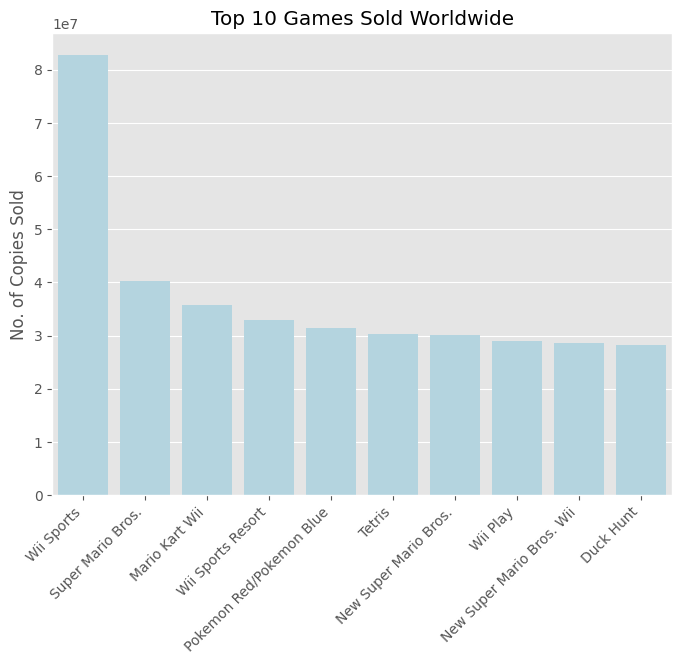

In [50]:
# The top games of all time

top_games = sales.sort_values(by='global_sales', ascending=False).head(10)


plt.figure(figsize=(8,6))
sns.barplot(data = top_games, x='name', y = 'global_sales', color = 'lightblue')


# set plot information
plt.title('Top 10 Games Sold Worldwide')
plt.xlabel('')
plt.ylabel('No. of Copies Sold')

plt.xticks(rotation = 45, ha = 'right')

plt.show()

Wii Sports leads in global sales by a significant margin, doubling the sales of the second-ranked game according to the graph.

In this graph, ALL the games in are published by Nintendo.

### Top 10 Publishers

Here shows the 10 publishers that published the most games.

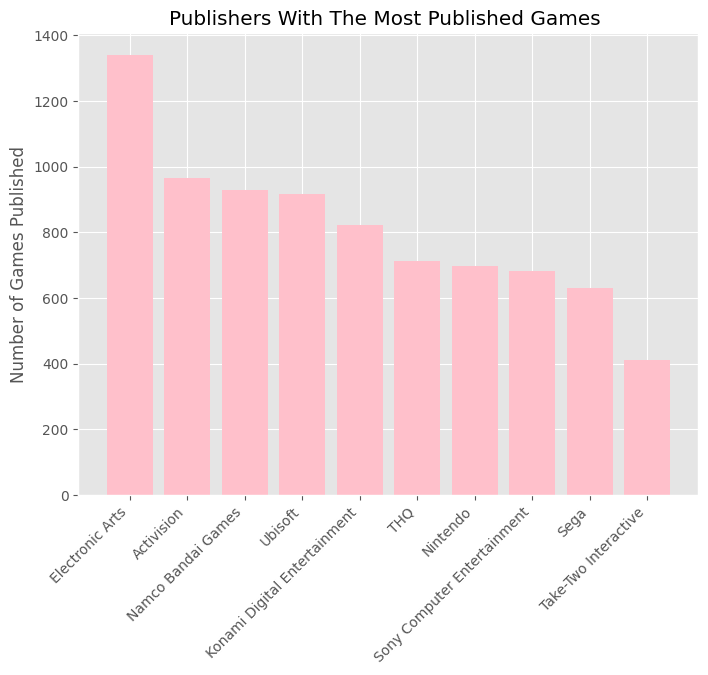

In [51]:
# Top 10 publisher

top_publisher = sales['publisher'].value_counts().head(10)


plt.figure(figsize=(8,6))


plt.bar(data = top_publisher, x = top_publisher.index.to_list(), height = top_publisher.values, color = 'pink')

# set plot information
plt.title('Publishers With The Most Published Games ')
plt.xlabel('')
plt.ylabel('Number of Games Published')

plt.xticks(rotation = 45, ha = 'right')

plt.show()

Here Electronic Arts (EA) published the most games, followed by Activision. Nintendo had the best global sales from the previous plot but is only ranked 8 in the total number of games published. 

### Publishers With The Most Sales

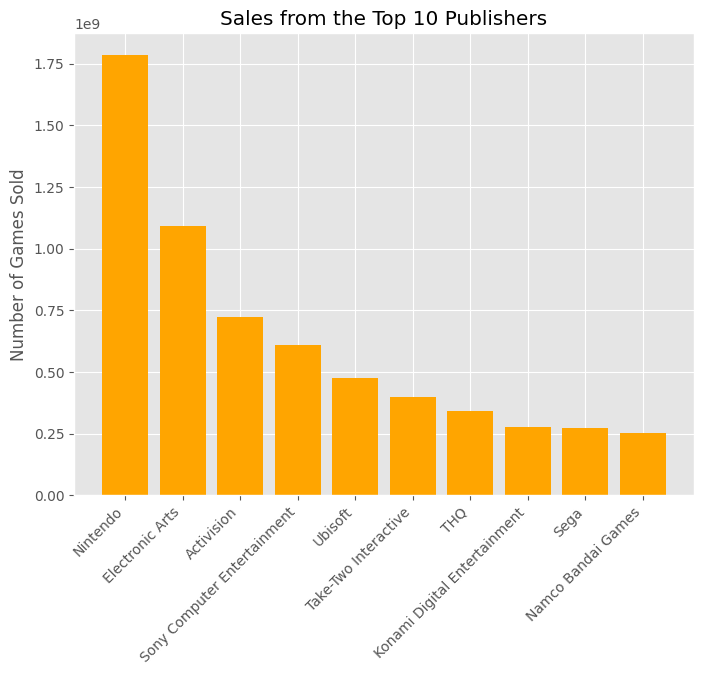

In [52]:
# Top 10 Publishers With the Most Sales

most_sales_publishers = sales.groupby(['publisher'])[['global_sales']].sum().sort_values(ascending=False, by='global_sales').head(10)


plt.figure(figsize=(8,6))

plt.bar(data = most_sales_publishers, x = most_sales_publishers.index.to_list(), height=most_sales_publishers.values.flatten(), color='orange')

# set plot information
plt.title('Sales from the Top 10 Publishers')
plt.xlabel('')
plt.ylabel('Number of Games Sold')

plt.xticks(rotation = 45, ha = 'right')

plt.show()

Taking into account the total number of global sales and publisher, we can see that Nintendo performs the best globally, followed by EA.

### Popular Platforms

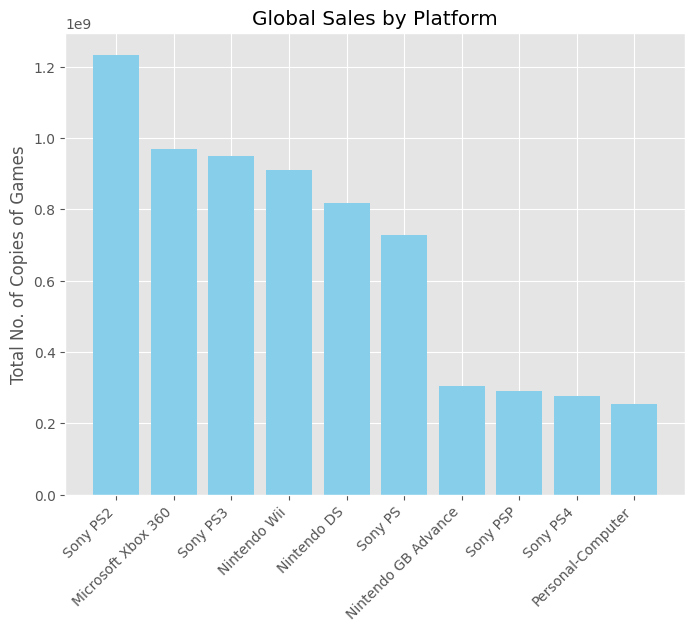

In [53]:
# platform with the most game titles

platform_sales = sales.groupby(['platform'])['global_sales'].sum().sort_values(ascending=False)[:10]



plt.figure(figsize=(8,6))


plt.bar(height= platform_sales.values, x = platform_sales.index, color = 'skyblue')


# set plot information
plt.title('Global Sales by Platform')
plt.xlabel('')
plt.ylabel('Total No. of Copies of Games')

plt.xticks(rotation = 45, ha = 'right')

plt.show()

- Sony PS2 stands out as the platform with the highest global sales, showing significantly more copies sold than any other platform.
- Microsoft Xbox 360, Sony PS3, and Nintendo Wii follow closely, indicating they are also popular platforms with high sales volumes.
- Nintendo DS and Sony PS also show considerable sales, though less than the leading platforms.
- Other platforms like Nintendo GB Advance, Sony PSP, Sony PS4, and Personal Computer display progressively lower sales figures.

### Popular Genre

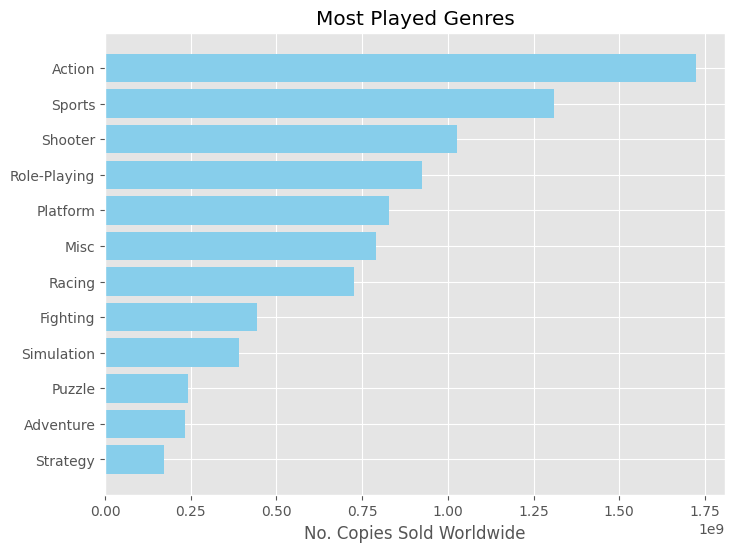

In [54]:
# Which Genre is Most Popular?

popular_genre = sales.groupby(['genre'])['global_sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(8,6))

plt.barh(popular_genre.index, popular_genre.values, color = 'skyblue')


# set plot info
plt.title('Most Played Genres')
plt.xlabel('No. Copies Sold Worldwide')

plt.gca().invert_yaxis()


plt.show()



The `Action` genre created the most revenue for game companies followed by `Sports`, then `Shooter`. 



###  Breakdown of game title for each genre

In [61]:
# create df subsets of each genre

genre_list = popular_genre.index.to_list()

print(genre_list)

genre_dfs_list = []

for genre in genre_list:

    temp_df = sales[sales['genre'] == genre]

    genre_dfs_list.append(temp_df)

print(genre_dfs_list[0].head())


# action_df = sales[sales['genre'] == genre_list[0]] # action genre
# sports_df = sales[sales['genre'] == genre_list[1]] # sports genre
# shooter_df = sales[sales['genre'] == genre_list[2]] # shooter genre
# rpg_df = sales[sales['genre'] == genre_list[3]] # role playing genre
# platform_df = sales[sales['genre'] == genre_list[4]] # platform genre
# misc_df = sales[sales['genre'] == genre_list[5]] # misc genre
# racing_df = sales[sales['genre'] == genre_list[6]] # racing genre
# fighting_df = sales[sales['genre'] == genre_list[7]] # fighting genre
# sim_df = sales[sales['genre'] == genre_list[8]] # simulation genre
# puzzle_df = sales[sales['genre'] == genre_list[9]] # puzzle genre
# adventure_df = sales[sales['genre'] == genre_list[-2]] # adventure genre
# strat_df = sales[sales['genre'] == genre_list[-1]] # strategy genre

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']
    rank                           name            platform  year   genre             publisher   na_sales   eu_sales  jp_sales  other_sales  global_sales video_game_company
16    17             Grand Theft Auto V            Sony PS3  2013  Action  Take-Two Interactive  7010000.0  9270000.0  970000.0    4140000.0    21400000.0               Sony
17    18  Grand Theft Auto: San Andreas            Sony PS2  2004  Action  Take-Two Interactive  9430000.0   400000.0  410000.0   10570000.0    20810000.0               Sony
23    24             Grand Theft Auto V  Microsoft Xbox 360  2013  Action  Take-Two Interactive  9630000.0  5310000.0   60000.0    1380000.0    16380000.0          Microsoft
24    25    Grand Theft Auto: Vice City            Sony PS2  2002  Action  Take-Two Interactive  8410000.0  5490000.0  470000.0    1780000.0    16150000.0           

In [79]:
print(sales['video_game_company'].unique())

['Nintendo' 'Microsoft' 'Sony' 'Personal-Computer' 'Atari 2600' 'Sega'
 'Bandai WonderSwan' 'Neo Geo' 'NEC' '3DO']


In [87]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [104]:
print(sales.head(2))

   rank               name      platform  year     genre publisher    na_sales    eu_sales   jp_sales  other_sales  global_sales video_game_company
0     1         Wii Sports  Nintendo Wii  2006    Sports  Nintendo  41490000.0  29020000.0  3770000.0    8460000.0    82740000.0           Nintendo
1     2  Super Mario Bros.  Nintendo NES  1985  Platform  Nintendo  29080000.0   3580000.0  6810000.0     770000.0    40240000.0           Nintendo


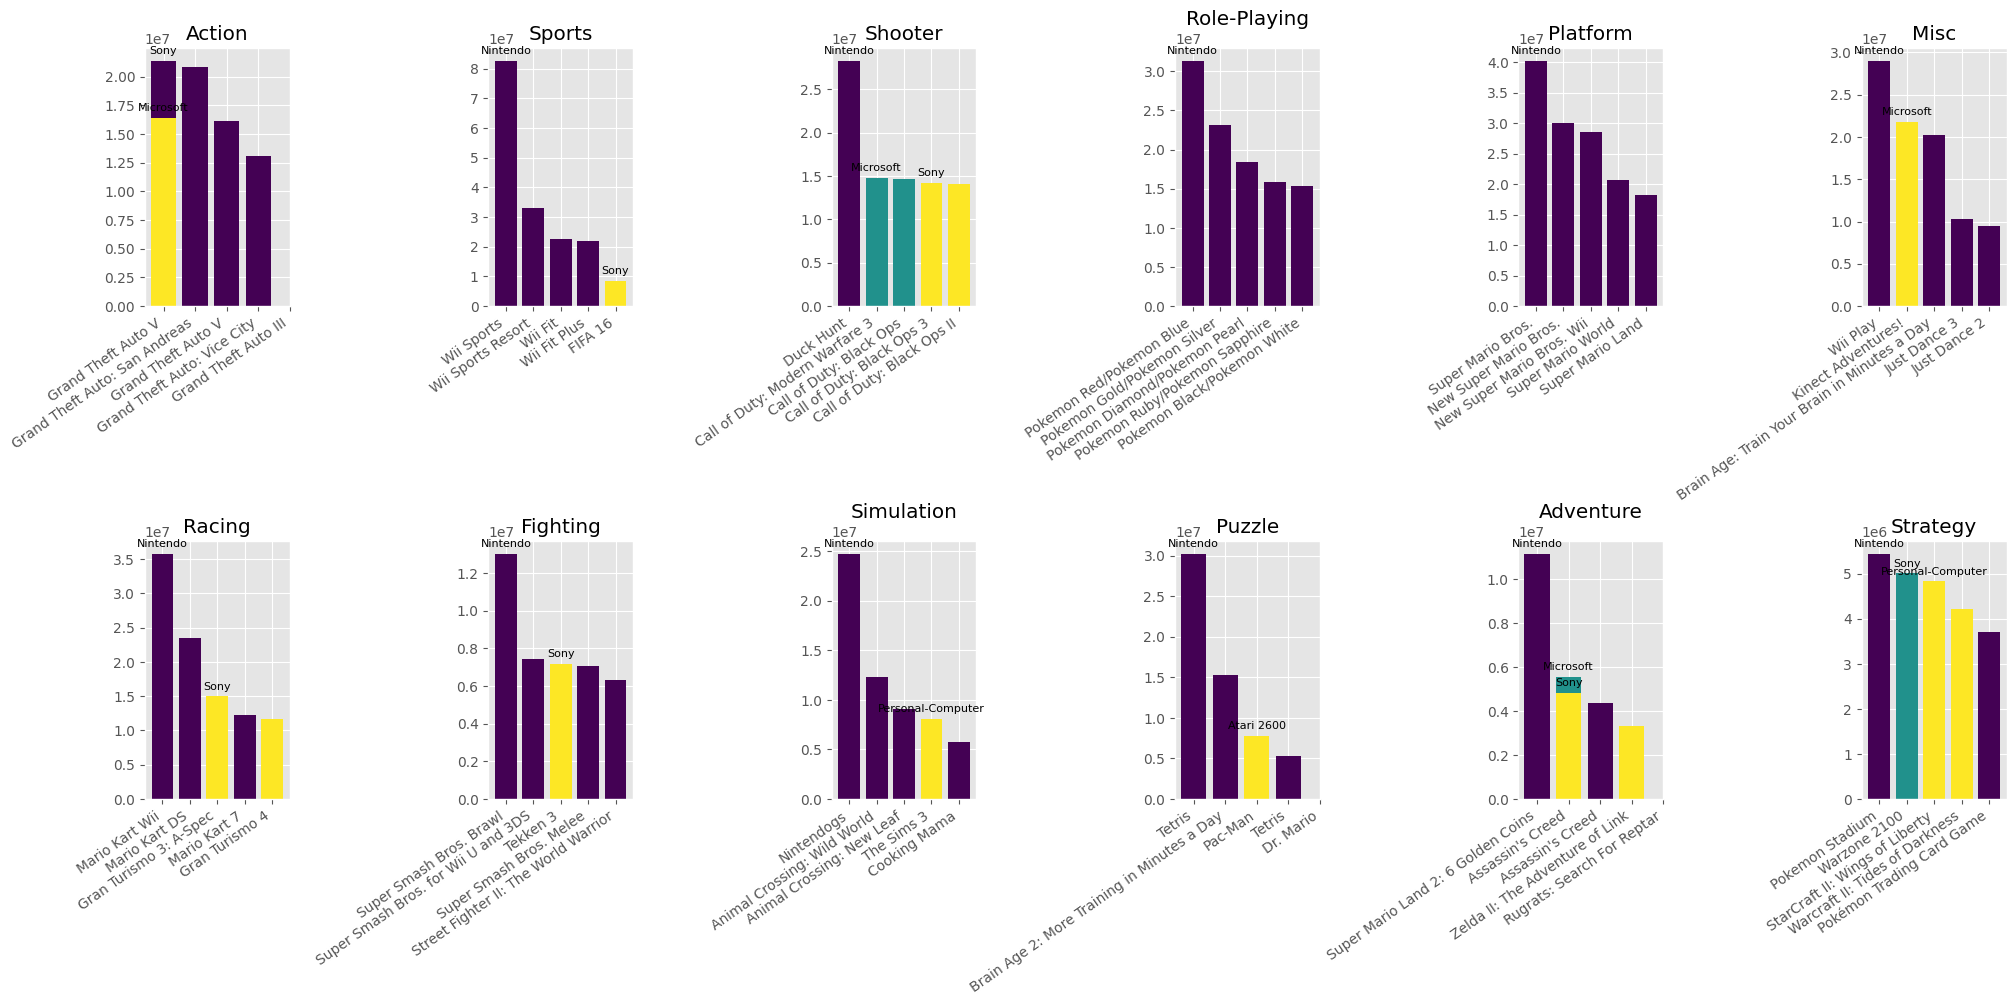

In [128]:
# plot a bar graph to show the top games for each genre

fig, axs = plt.subplots(2,6, figsize=(20,10))
axs = axs.flatten() # flatten to ease the iteration


for index, genre_df in enumerate(genre_dfs_list):

    genre_df = genre_df.sort_values(by='global_sales', ascending=False).head(5)


    # color mapping
    unique_video_co = genre_df['video_game_company'].unique()
    colours = plt.get_cmap('viridis')(np.linspace(0, 1, len(unique_video_co)))
    colour_dict = dict(zip(unique_video_co, colours))

    ax = axs[index]
    annotated_companies = set()  # Track annotated companies to avoid duplication

    # plot each genre as a plot with the best-selling titles and video game console company
    for i, row in genre_df.iterrows():

        bar = ax.bar(row['name'], row['global_sales'], color = colour_dict[row['video_game_company']]) # plot the graph
        
        # Check if the company has been annotated
        if row['video_game_company'] not in annotated_companies:
            ax.annotate(row['video_game_company'], 
                        (bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height()), 
                        textcoords="offset points", 
                        xytext=(0, 5), 
                        ha='center',
                        fontsize = 8)
            annotated_companies.add(row['video_game_company'])  # Mark this company as annotated
        
        ax.set_title(f'{genre_df['genre'].iloc[0]}')

        ax.set_xticks(range(len(genre_df['name'])))
        ax.set_xticklabels(genre_df['name'], rotation = 35, ha = 'right')

 

plt.tight_layout()
plt.show()



### Sales Trend from 1980 to 2020

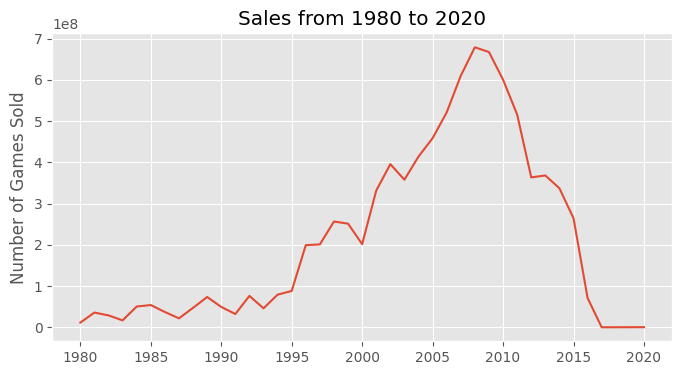

In [56]:
# Distribution of sales over time

most_sales_year = sales.groupby('year')['global_sales'].sum()

plt.figure(figsize=(8,4))

sns.lineplot(x = most_sales_year.index.to_list(), y = most_sales_year.values)

# set plot information
plt.title('Sales from 1980 to 2020')
plt.xlabel('')
plt.ylabel('Number of Games Sold')


plt.show()

Overall video game sales was on an increase from 1980 to 2008 with a sharp decline from 2009. 

In [57]:
# Create a new column for video game company

video_game_co = []

for index, values in sales.iterrows():

    if 'Nintendo' in values['platform']:
        video_game_co.append('Nintendo')

    elif 'Microsoft' in values['platform']:
        video_game_co.append('Microsoft')

    elif 'Sony' in values['platform']:
        video_game_co.append('Sony')
    
    elif 'Sega' in values['platform']:
        video_game_co.append('Sega')
    
    elif 'NEC' in values['platform']:
        video_game_co.append('NEC')
    
    else:
        video_game_co.append(values['platform'])
        

# assign new column to the created list        
sales['video_game_company'] = video_game_co

print(sales.head())


   rank                      name          platform  year         genre publisher    na_sales    eu_sales    jp_sales  other_sales  global_sales video_game_company
0     1                Wii Sports      Nintendo Wii  2006        Sports  Nintendo  41490000.0  29020000.0   3770000.0    8460000.0    82740000.0           Nintendo
1     2         Super Mario Bros.      Nintendo NES  1985      Platform  Nintendo  29080000.0   3580000.0   6810000.0     770000.0    40240000.0           Nintendo
2     3            Mario Kart Wii      Nintendo Wii  2008        Racing  Nintendo  15850000.0  12880000.0   3790000.0    3310000.0    35820000.0           Nintendo
3     4         Wii Sports Resort      Nintendo Wii  2009        Sports  Nintendo  15750000.0  11010000.0   3280000.0    2960000.0    33000000.0           Nintendo
4     5  Pokemon Red/Pokemon Blue  Nintendo GameBoy  1996  Role-Playing  Nintendo  11270000.0   8890000.0  10220000.0    1000000.0    31370000.0           Nintendo


#### Sales based on video game company

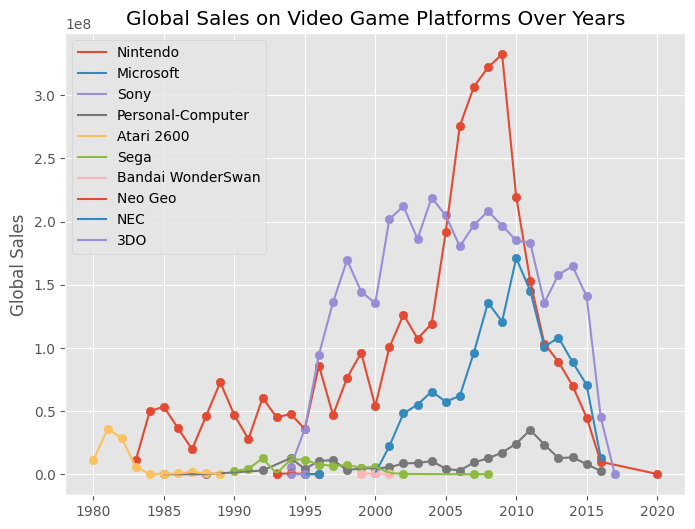

In [58]:
game_coy = sales.groupby(['video_game_company','year'])['global_sales'].sum().reset_index()

# print(game_coy)

companies = sales['video_game_company'].unique()

plt.figure(figsize=(8,6))

for co in companies:

    temp_df = game_coy[game_coy['video_game_company'] == co]

    # plotting

    plt.scatter(temp_df['year'], temp_df['global_sales'])
    plt.plot(temp_df['year'], temp_df['global_sales'], label = f'{co}')




# set plot info
plt.title('Global Sales on Video Game Platforms Over Years')
plt.xlabel('')
plt.ylabel('Global Sales')
plt.legend()



plt.show()

The top 3 companies that designs and develop consoles to play video games are Nintendo (Wii, Gameboy, Switch), Sony (PlayStation), and Microsoft (Xbox). Currently, they are the three most popular platforms for console gaming.